In [2]:
import pandas as pd

train_data = pd.read_csv('/Users/munafarah/Desktop/school/practice coding/titanic copy/train.csv')
test_data = pd.read_csv('/Users/munafarah/Desktop/school/practice coding/titanic copy/test.csv')
gender_sub = pd.read_csv('/Users/munafarah/Desktop/school/practice coding/titanic copy/gender_submission.csv')


print(train_data.head())
print(test_data.head())
print(gender_sub.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [3]:
train_data.describe()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_data.describe()
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [5]:
gender_sub.describe()
gender_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [6]:
print(train_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
print(test_data.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [8]:
print(gender_sub.columns)

Index(['PassengerId', 'Survived'], dtype='object')



Women who survived: 18.89%

Men who survived: 74.20%

1st class passengers who survived: 62.96%

2nd class passengers who survived: 47.28%

3rd class passengers who survived: 24.24%

Average age of survivors: 28.34

Average age of non-survivors: 30.63


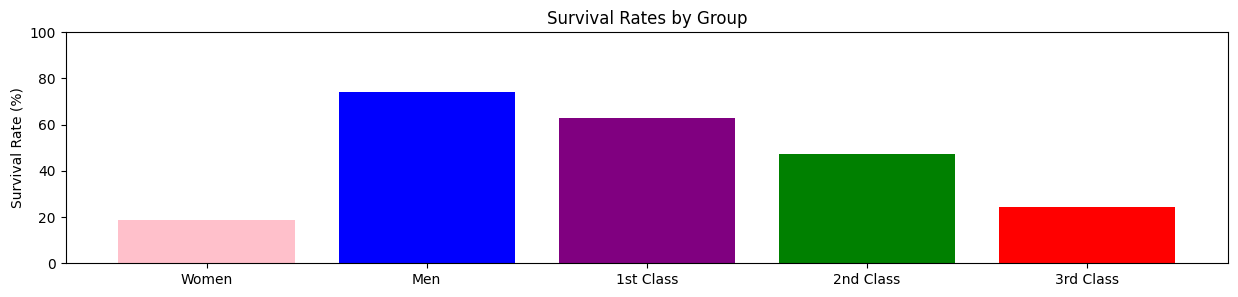

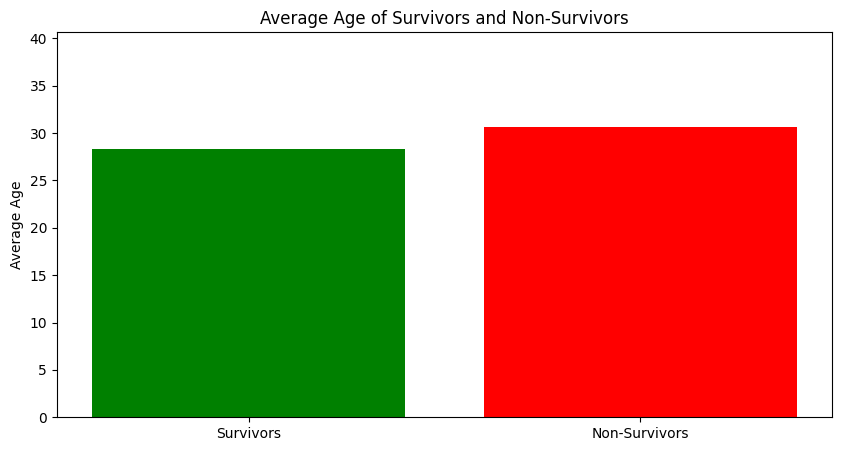

In [9]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#Turns the cateogical sex column into numerical values(F=0, M=1)
le = LabelEncoder() 
train_data['Sex'] = le.fit_transform(train_data['Sex']) 


#Exploratory Data Analysis
women = train_data.loc[train_data.Sex == 1]["Survived"]
rate_women = sum(women)/len(women) *100
print(f"\nWomen who survived: {rate_women:.2f}%")

men = train_data.loc[train_data.Sex == 0]["Survived"]
rate_men = sum(men)/len(men) * 100
print(f"\nMen who survived: {rate_men:.2f}%")

class_1 = train_data.loc[train_data['Pclass'] == 1]["Survived"]
rate_class_1 = class_1.mean() *100
print(f"\n1st class passengers who survived: {rate_class_1:.2f}%")

class_2 = train_data.loc[train_data['Pclass'] == 2]["Survived"]
rate_class_2 = class_2.mean() *100
print(f"\n2nd class passengers who survived: {rate_class_2:.2f}%")

class_3 = train_data.loc[train_data['Pclass'] == 3]["Survived"]
rate_class_3 = class_3.mean() *100
print(f"\n3rd class passengers who survived: {rate_class_3:.2f}%")

survivors = train_data.loc[train_data['Survived'] == 1]['Age']
avg_age_survivors = survivors.mean() 
print(f"\nAverage age of survivors: {avg_age_survivors:.2f}")

non_survivors = train_data.loc[train_data['Survived'] == 0]['Age']
avg_age_non_survivors = non_survivors.mean() 
print(f"\nAverage age of non-survivors: {avg_age_non_survivors:.2f}")

labels = ['Women', 'Men', '1st Class', '2nd Class', '3rd Class']
rates = [rate_women, rate_men, rate_class_1, rate_class_2, rate_class_3]

plt.figure(figsize=(15, 3))
bars = plt.bar(labels, rates, color=['pink', 'blue', 'purple', 'green', 'red'])
plt.title('Survival Rates by Group')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100) 
plt.show()

age_labels = ['Survivors', 'Non-Survivors']
avg_ages = [avg_age_survivors, avg_age_non_survivors]

plt.figure(figsize=(10, 5))
bars_age = plt.bar(age_labels, avg_ages, color=['green', 'red'])
plt.title('Average Age of Survivors and Non-Survivors')
plt.ylabel('Average Age')
plt.ylim(0, max(avg_ages) + 10)
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 


#Removes the columns that are needed for modeling
def clean_df(df, columns_drop):
    return df.drop(columns=columns_drop)
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
train_data = clean_df(train_data, columns_to_drop)
test_data = clean_df(test_data, columns_to_drop)

#Trains and test the data using 70/30 split
X = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
y = train_data['Survived'] 

X_train, X_test, y_train, y_test = train_test_split (
    X, y, test_size=0.3, random_state=42 
)

#Imputes the missing values with the mean of the column 
imp = SimpleImputer(strategy='mean')
imp.fit(X_train) 
X_train = imp.transform(X_train)
X_test = imp.transform(X_test)

print(X_train, X_test)


[[ 1.          1.          4.          0.          2.        ]
 [ 3.          1.         29.25635271  0.          0.        ]
 [ 3.          0.          1.          1.          1.        ]
 ...
 [ 3.          1.         41.          2.          0.        ]
 [ 1.          0.         14.          1.          2.        ]
 [ 1.          1.         21.          0.          1.        ]] [[ 3.          1.         29.25635271  1.          1.        ]
 [ 2.          1.         31.          0.          0.        ]
 [ 3.          1.         20.          0.          0.        ]
 ...
 [ 1.          1.         65.          0.          0.        ]
 [ 3.          1.         17.          0.          0.        ]
 [ 1.          1.         28.          0.          0.        ]]


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_test) 

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:", classification_report(y_test, y_pred))
print("Confusion matrix:", confusion_matrix(y_test, y_pred))

#Predicting the survival rate using accuracy 
survivors = y_test[y_test == 1]
survivors_pred = y_pred[y_test == 1]
accuracy_survivors = (survivors == survivors_pred).mean() * 100

#Predicting the non-survival rate using accuracy
non_survivors = y_test[y_test == 0]
non_survivors_pred = y_pred[y_test == 0]
accuracy_non_survivors = (non_survivors == non_survivors_pred).mean() * 100



Accuracy: 0.8283582089552238
Classification report:               precision    recall  f1-score   support

           0       0.83      0.89      0.86       157
           1       0.83      0.74      0.78       111

    accuracy                           0.83       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268

Confusion matrix: [[140  17]
 [ 29  82]]


In [17]:
print(f"Accuracy of Survivors: {accuracy_survivors:.2f}%")
print(f"Accuracy of Non-Survivors: {accuracy_non_survivors:.2f}%")

Accuracy of Survivors: 73.87%
Accuracy of Non-Survivors: 89.17%


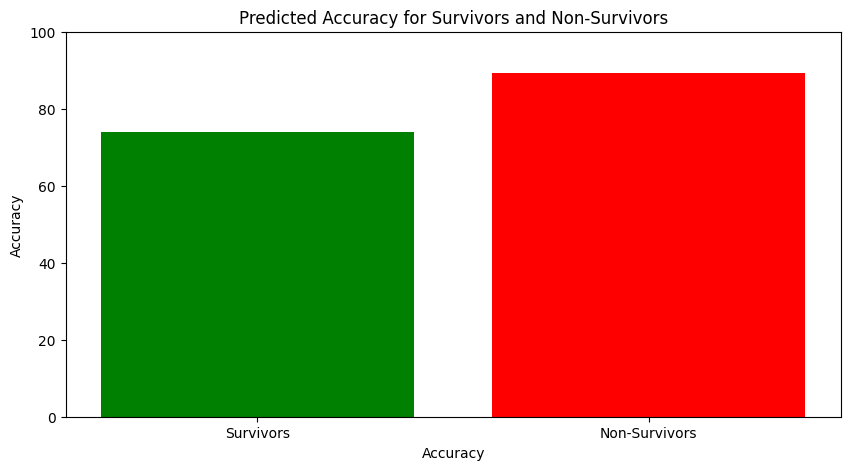

In [13]:
accuracy_labels = ['Survivors', 'Non-Survivors']
accuracy_rates = [accuracy_survivors, accuracy_non_survivors]


plt.figure(figsize=(10, 5))
plt.bar(accuracy_labels, accuracy_rates, color=['green', 'red'])
plt.title('Predicted Accuracy for Survivors and Non-Survivors')
plt.xlabel("Accuracy")
plt.ylabel('Accuracy')
plt.ylim(0, 100)
plt.show()